In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import cv2
from matplotlib import image

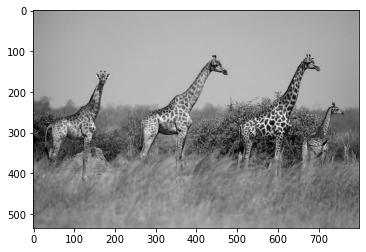

In [2]:
img=plt.imread("/home/starfish/图片/41.jpg")
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray,cmap="gray")

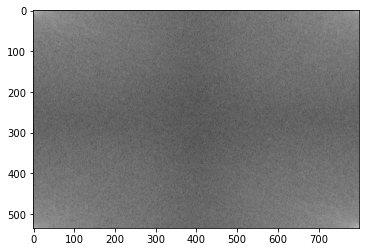

In [3]:
# 求fft
fft_img=np.fft.fft2(img_gray)

fuzhi=np.abs(fft_img)

log_fft=np.log(np.abs(fft_img))
plt.imshow(log_fft,cmap="gray")

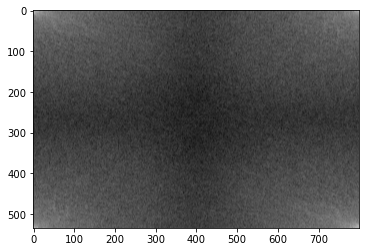

In [4]:
# 对fft结果滤波
box_filter=np.ones(5)/25
fft_filted=cv2.filter2D(src=log_fft,ddepth=-1,kernel=box_filter)
plt.imshow(fft_filted,cmap="gray")

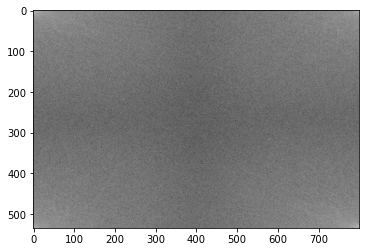

In [5]:
resi_fft=log_fft-fft_filted
plt.imshow(resi_fft,cmap="gray")

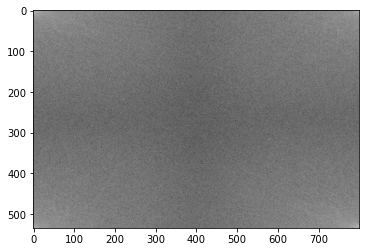

In [6]:
re_magnitude=np.exp(resi_fft)
plt.imshow(resi_fft,cmap="gray")

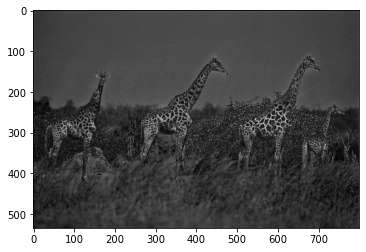

In [7]:
res=np.abs(np.fft.ifft2(fft_img/fuzhi*re_magnitude))/np.abs(np.fft.ifft2(fft_img/fuzhi*re_magnitude)).max()
plt.imshow(res,cmap="gray")

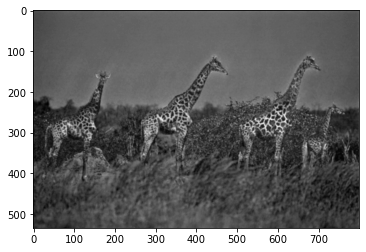

In [8]:
blur_res=cv2.GaussianBlur(src=res,ksize=(7,7),sigmaX=1)
plt.imshow(blur_res,cmap="gray")

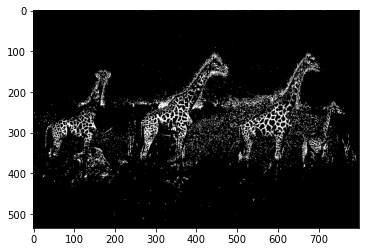

In [11]:
threshold_=res.mean()*1.5
bin_img=res>threshold_
plt.imshow(bin_img,cmap="gray")